# Seaborn Guide

Chart types can be divided into three broad categories:

- **Trends**: visualize pattern of change
    - **sns.lineplot**: line charts to show trends over a period of time.
    
    
- **Relationship**: visualize and understand relationships between different features
    - **sns.barplot**: bar charts are useful for comparing quantities corresponding to different groups.
    - **sns.heatmap**: heatmaps can be used to find color-coded patterns in tables of numbers.
    - **sns.scatterplot**: scatter plots show the relationship between two continuous variables; if color-coded, it can also show the relationship with a third categorical variable.
    - **sns.regplot**: including a regression line in the scatter plot.
    - **sns.lmplot**: draws multiple regression lines for multiple color coded groups scatter plot.
    - **sns.swarmplot**: categorical scatter plots, it shows the relationship between a continuous variable and a categorical variable.
    
    
- **Distribution**: visualize distributions of variables contained in our dataset
    - **sns.histplot**: histograms show the distribution of a single numerical variable.
    - **sns.kdeplot**: kernel density estimate (KDE) plots (or 2D KDE plots) show an estimated, smooth distribution of a numerical variable.
    - **sns.jointplot**: simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

In [132]:
import pandas as pd
pd.plotting.register_matplotlib_converters() # don’t need to call it manually for Pandas ≥ 1.0, Matplotlib ≥ 3.1
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


Import dataset for visualisation guide from Kaggle, link: https://www.kaggle.com/datasets/alexisbcook/data-for-datavis?select=fifa.csv

This is a historical FIFA rankings dataset for six countries: Argentina (ARG), Brazil (BRA), Spain (ESP), France (FRA), Germany (GER), and Italy (ITA)

In [133]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")

print("Path to dataset files:", path)

fifa_data = pd.read_csv(path+"\\fifa.csv", index_col="Date", parse_dates=True)
# index_col = "Date" sets the Date column as index column of the loaded dataset
# parse_dates = True signals the notebook that each row label has a date format

Path to dataset files: C:\Users\lucad\.cache\kagglehub\datasets\alexisbcook\data-for-datavis\versions\2


In [134]:
fifa_data.head()

ARG  BRA   ESP   FRA  GER  ITA
Date                                       
1993-08-08   5.0  8.0  13.0  12.0  1.0  2.0
1993-09-23  12.0  1.0  14.0   7.0  5.0  2.0
1993-10-22   9.0  1.0   7.0  14.0  4.0  3.0
1993-11-19   9.0  4.0   7.0  15.0  3.0  1.0
1993-12-23   8.0  3.0   5.0  15.0  1.0  2.0

## Plot a **linechart** showing how FIFA rankings evolved over time 

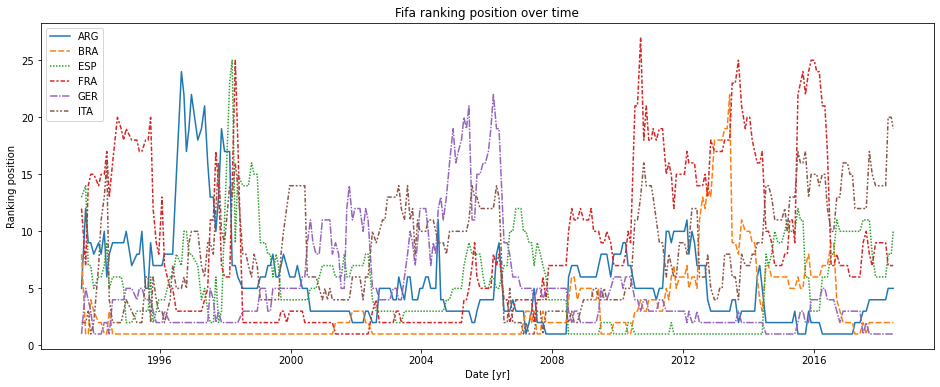

In [135]:
plt.figure(figsize=(16,6)) # width and height of the figure
sns.lineplot(data=fifa_data, )
plt.title("Fifa ranking position over time")
plt.ylabel('Ranking position')
plt.xlabel('Date [yr]')
plt.show()

### Plot a subset of the data

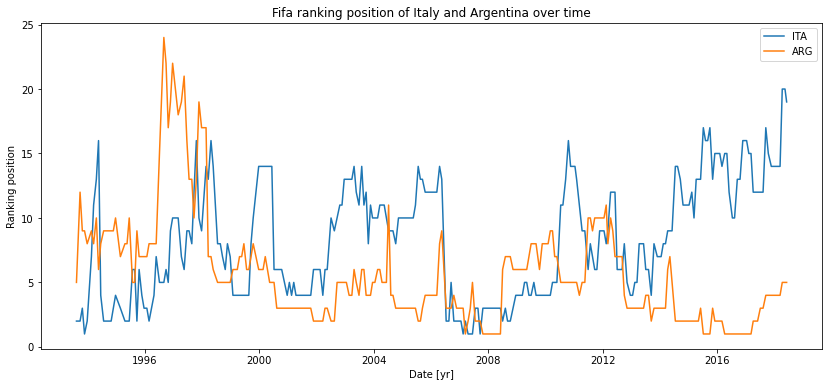

In [136]:
plt.figure(figsize=(14,6))

# Line chart showing ranking position of Italy and Argentina over time
sns.lineplot(data=fifa_data['ITA'], label="ITA")
sns.lineplot(data=fifa_data['ARG'], label="ARG")

plt.title("Fifa ranking position of Italy and Argentina over time")
plt.ylabel('Ranking position')
plt.xlabel('Date [yr]')
plt.show()

## Bar chart

In [137]:
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")

print("Path to dataset files:", path)

insurance_data = pd.read_csv(path+"\\insurance.csv", index_col='age')
insurance_data.head()

Path to dataset files: C:\Users\lucad\.cache\kagglehub\datasets\alexisbcook\data-for-datavis\versions\2


sex     bmi  children smoker     region      charges
age                                                         
19   female  27.900         0    yes  southwest  16884.92400
18     male  33.770         1     no  southeast   1725.55230
28     male  33.000         3     no  southeast   4449.46200
33     male  22.705         0     no  northwest  21984.47061
32     male  28.880         0     no  northwest   3866.85520

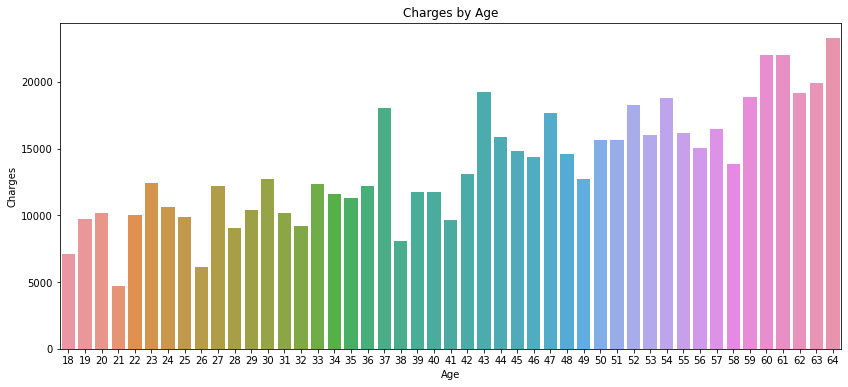

In [138]:
plt.figure(figsize=(14,6))
sns.barplot(x=insurance_data.index, y=insurance_data['charges'], ci=None)
plt.title("Charges by Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

## Heatmap

In [139]:
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")
print("Path to dataset files:", path)
flight_data = pd.read_csv(path+"\\flight_delays.csv", index_col="Month")
flight_data.head()

Path to dataset files: C:\Users\lucad\.cache\kagglehub\datasets\alexisbcook\data-for-datavis\versions\2


AA        AS         B6        DL         EV         F9  \
Month                                                                  
1      6.955843 -0.320888   7.347281 -2.043847   8.537497  18.357238   
2      7.530204 -0.782923  18.657673  5.614745  10.417236  27.424179   
3      6.693587 -0.544731  10.741317  2.077965   6.730101  20.074855   
4      4.931778 -3.009003   2.780105  0.083343   4.821253  12.640440   
5      5.173878 -1.716398  -0.709019  0.149333   7.724290  13.007554   

             HA         MQ         NK         OO        UA        US  \
Month                                                                  
1      3.512640  18.164974  11.398054  10.889894  6.352729  3.107457   
2      6.029967  21.301627  16.474466   9.588895  7.260662  7.114455   
3      3.468383  11.018418  10.039118   3.181693  4.892212  3.330787   
4      0.011022   5.131228   8.766224   3.223796  4.376092  2.660290   
5      0.826426   5.466790  22.397347   4.141162  6.827695  0.681605   

             VX        WN  
Month                      
1      1.420702  3.389466  
2      7.784410  3.501363  
3      5.348207  3.263341  
4      0.995507  2.996399  
5      7.102021  5.680777

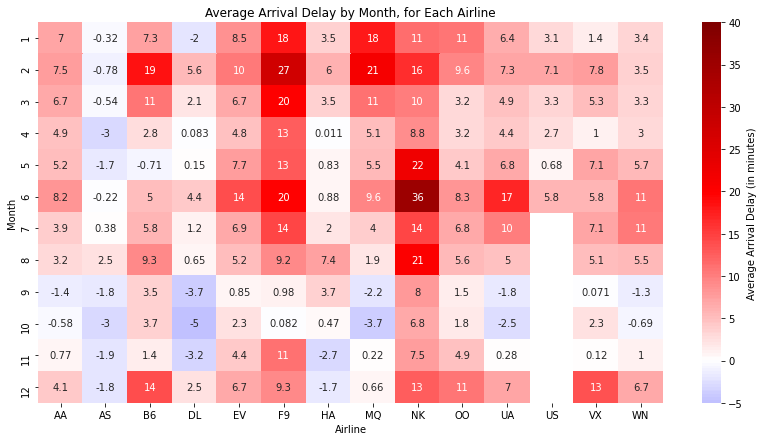

In [140]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay by Month, for Each Airline")
sns.heatmap(data=flight_data, annot=True, center=0, vmin=-5, vmax=40,
    cmap='seismic', cbar_kws={'label': 'Average Arrival Delay (in minutes)'}, )
plt.xlabel("Airline")
plt.show()

Path to dataset files: C:\Users\lucad\.cache\kagglehub\datasets\alexisbcook\data-for-datavis\versions\2


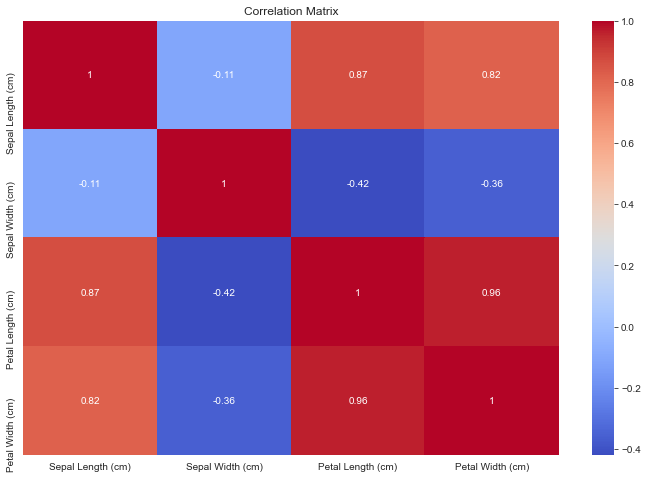

In [209]:
# Correlation heatmap

path = kagglehub.dataset_download("alexisbcook/data-for-datavis")
print("Path to dataset files:", path)
iris_data = pd.read_csv(path+"\\iris.csv", index_col="Id")

plt.figure(figsize=(12,8))
sns.heatmap(iris_data.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix");

## Scatter plots

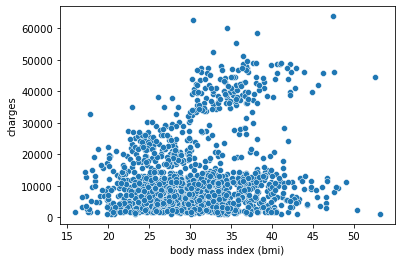

In [141]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.xlabel('body mass index (bmi)')
plt.show()

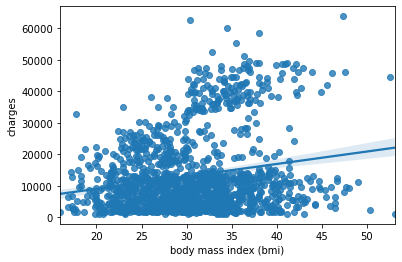

In [142]:
# We can add a regression line to the scatter plot by calling regplot() instead of the basic scatterplot()

sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.xlabel('body mass index (bmi)')
plt.show()

### Color-coded scatter plots

hue = grouping variable that will produce points with different colors. Can be either categorical or numeric.

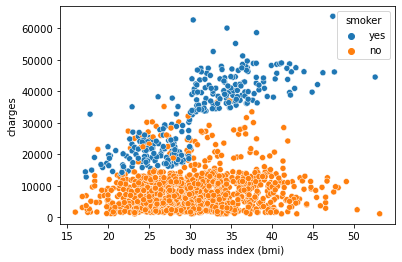

In [143]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])
plt.xlabel('body mass index (bmi)')
plt.show()

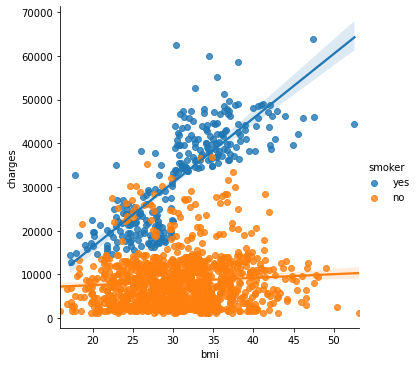

In [144]:
# sns.lmplot gives the possibility to fit multiple regression lines to our scatter plot

sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)
plt.show()

### Categorical scatter plot

Plot a categorical variable on one of the main axis

C:\Users\lucad\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


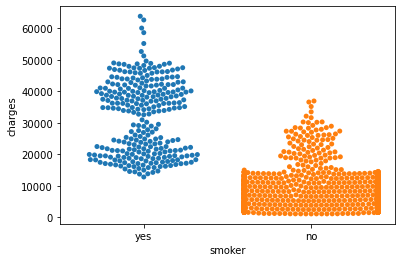

In [145]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])
plt.show()

## Distributions

### Histograms

In [150]:
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")
print("Path to dataset files:", path)
iris_data = pd.read_csv(path+"\\iris.csv", index_col="Id")
iris_data.head()

Path to dataset files: C:\Users\lucad\.cache\kagglehub\datasets\alexisbcook\data-for-datavis\versions\2


Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
Id                                                                             
1                 5.1               3.5                1.4               0.2   
2                 4.9               3.0                1.4               0.2   
3                 4.7               3.2                1.3               0.2   
4                 4.6               3.1                1.5               0.2   
5                 5.0               3.6                1.4               0.2   

        Species  
Id               
1   Iris-setosa  
2   Iris-setosa  
3   Iris-setosa  
4   Iris-setosa  
5   Iris-setosa

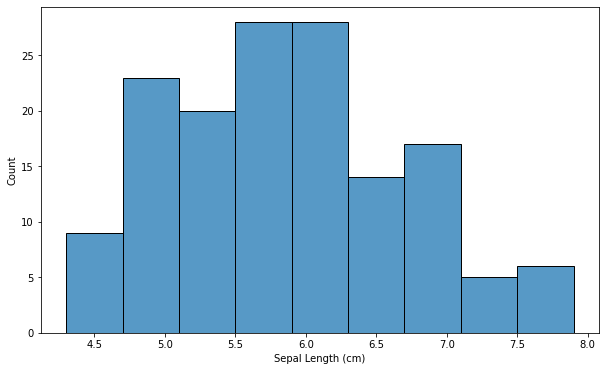

In [156]:
plt.figure(figsize=(10,6))
sns.histplot(iris_data['Sepal Length (cm)'])
plt.show()

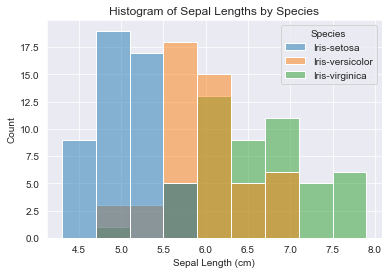

In [176]:
sns.histplot(data=iris_data, x='Sepal Length (cm)', hue='Species')
plt.title("Histogram of Sepal Lengths by Species");

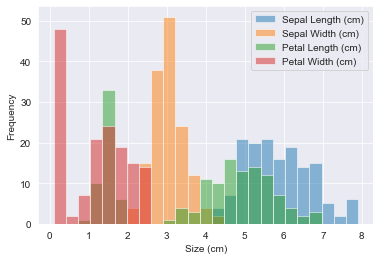

In [178]:
# or to plot histogram of all features together 
ax = iris_data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

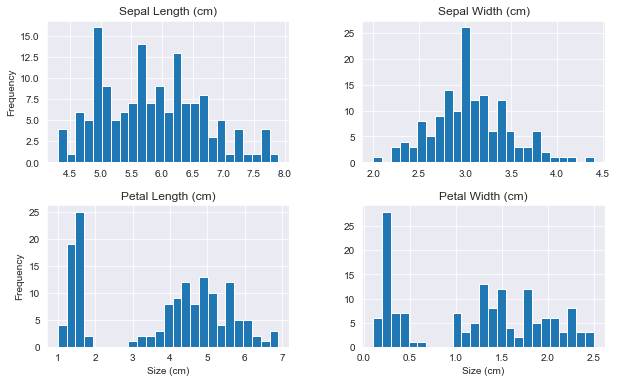

In [184]:
# To create four separate plots
axList = iris_data.hist(bins=25, figsize=(10, 6))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

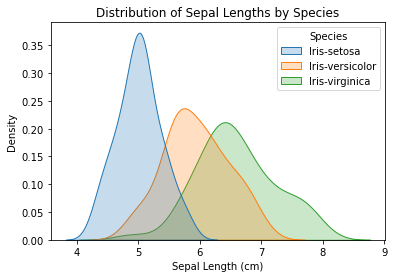

In [165]:
sns.kdeplot(data=iris_data, x='Sepal Length (cm)', hue='Species', shade=True)
plt.title("Distribution of Sepal Lengths by Species")
plt.show()

### kernel density estimate (KDE) plot

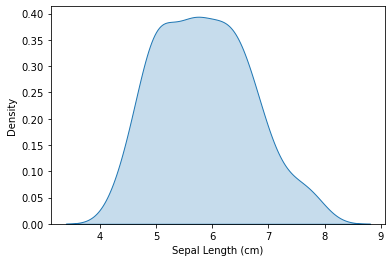

In [160]:
sns.kdeplot(data=iris_data['Sepal Length (cm)'], shade=True)
plt.show()

### two-dimensional (2D) KDE plot

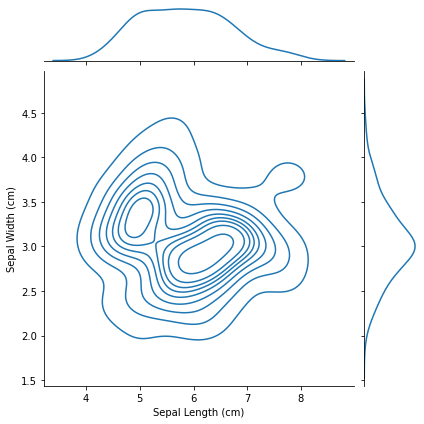

In [162]:
sns.jointplot(x=iris_data['Sepal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")
plt.show()

## Style of seaborn figure

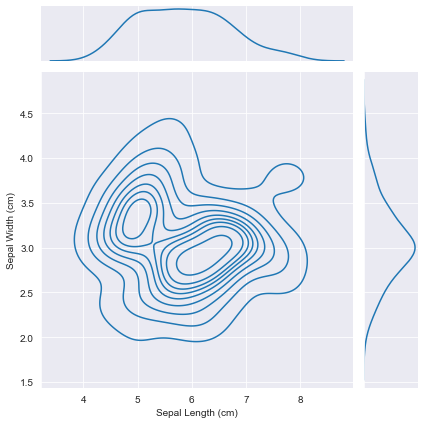

In [169]:
# Change the style of the figure to the "darkgrid" theme
sns.set_style("darkgrid")
sns.jointplot(x=iris_data['Sepal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")
plt.show()

## Box Plot

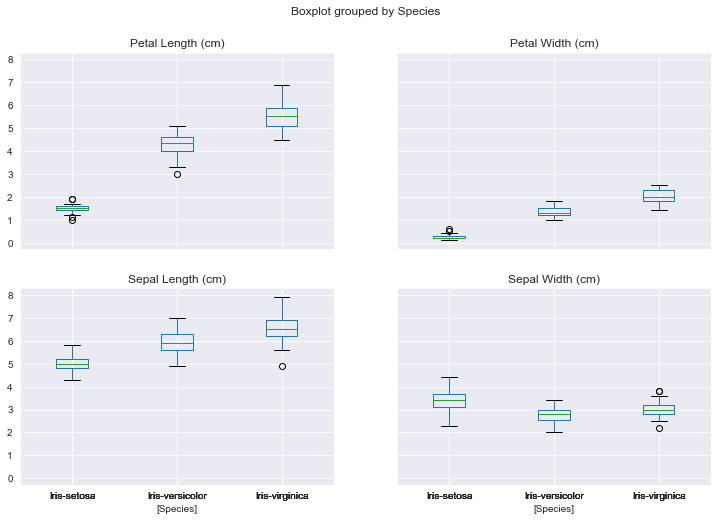

In [196]:
iris_data.boxplot(by='Species', figsize=(12,8));

In [197]:
## Pairplot seaborn

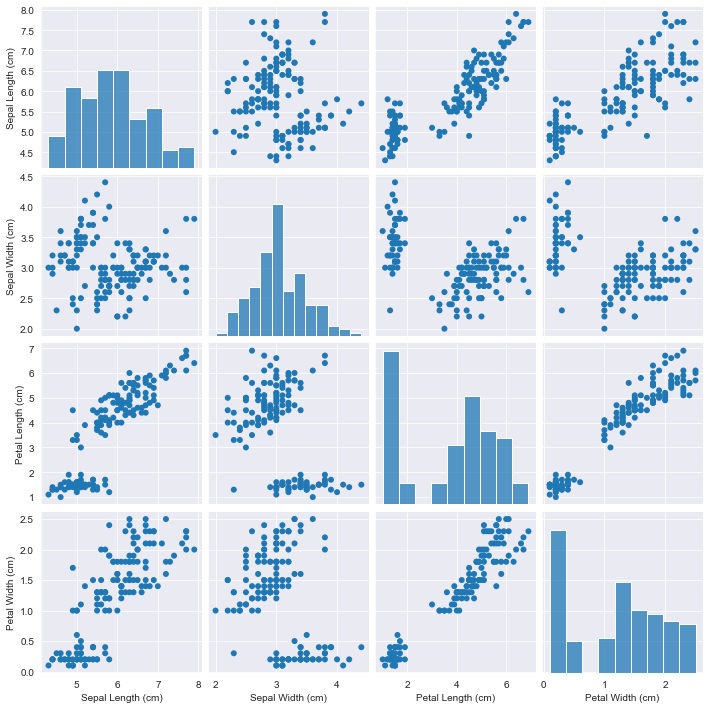

In [199]:
sns.pairplot(iris_data, plot_kws=dict(alpha=1.0, edgecolor='none'));

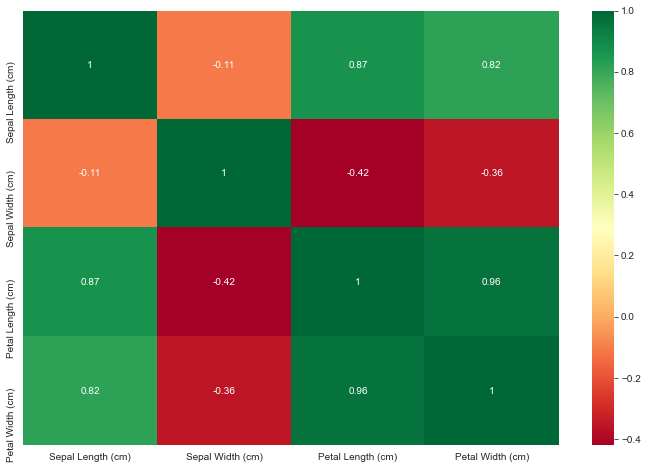

In [203]:
plt.figure(figsize=(12,8))
sns.heatmap(iris_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Visualizing the data with pandas plotly.express

The plotly.express library contains functions that can create entire figures at once.

plotly.express is a built-in part of the plotly library

Dataset source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000101

In [264]:
gasoline_data = pd.read_csv("datasets\gasoline_canada.csv")
gasoline_data.head()

data_plot = (gasoline_data[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})

data_plot['DATE'] = pd.to_datetime(data_plot['DATE'], format='%Y-%m')
data_plot['Month'] = data_plot['DATE'].dt.month_name().str.slice(stop=3)
data_plot['Year'] = data_plot['DATE'].dt.year
data_plot[['City', 'Province']] = data_plot['GEO'].str.split(',', n=1, expand=True)

price_bycity = data_plot.groupby(['Year', 'GEO'])['VALUE'].mean().reset_index(name ='Value').round(2)
price_bycity

Year                                                GEO   Value
0    2010                                   Calgary, Alberta   92.95
1    2010                                             Canada  102.87
2    2010  Charlottetown and Summerside, Prince Edward Is...  101.15
3    2010                                  Edmonton, Alberta   90.17
4    2010                               Halifax, Nova Scotia  105.86
..    ...                                                ...     ...
299  2025                        Vancouver, British Columbia  176.43
300  2025                         Victoria, British Columbia  174.05
301  2025                                  Whitehorse, Yukon  172.02
302  2025                                 Winnipeg, Manitoba  142.25
303  2025                 Yellowknife, Northwest Territories  153.07

[304 rows x 3 columns]

In [256]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook' # set the right renderer to 'notebook', which is specifically designed for classic Jupyter:
print(pio.renderers.default) # check renderer

fig = px.line(price_bycity
                   ,x='Year', y = "Value", 
                   color = "GEO", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre");
fig.show()

notebook


In [259]:
# plot the average monthly prices of gasoline in Vancouver for the year of 2024

mon_trend = data_plot[(data_plot['Year'] ==  2024) & (data_plot['GEO'] == "Vancouver, British Columbia")]
group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")

fig = px.line(group_month,
                   x='Month', y = "VALUE")
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Vancouver Average Monthly Gasoline Price in 2024",
    xaxis_title="Month",
    yaxis_title="Monthly Price, Cents per Litre")
fig.show()

In [265]:
# animated time frame to show the trend of gasoline prices over time.

bycity = data_plot.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)
fig = px.bar(bycity,  
            x='City', y = "Value", animation_frame="Year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()